In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from functools import reduce
 
def parse_if_number(s): 
    try: return float(s) 
    except: return True if s=="true" else False if s=="false" else s if s else None 
 
def parse_ndarray(s): 
    return np.fromstring(s, sep=' ') if s else None 

import seaborn as sns

In [11]:
# vector Name
pdr_vector = 'periodCAM:vector'
pdr_mean_vector = 'periodCAM:mean'
minTTC_vector = 'minTTC:vector'
minTTC_mean = 'minTTC:mean'
maxDRAC_vector = 'maxDRAC:vector'
maxDRAC_mean = 'maxDRAC:mean'
IAoI_vector = 'IAoI:vector'
IAoI_mean = 'IAoI:mean'
leader_vector = 'leader:vector'

csvName = [
    'test-ss95.csv',  # Aircomp Lust 92dura
]

In [12]:
#  opp_scavetool export -f '("tbDecoded:vector" OR "txRxDistanceTB:vector" OR "tbReceived:vector" OR "periodCAM:vector" OR "periodCAM:mean" OR "selfTE:vector" OR "selfTE:mean" OR "minTTC:vector" OR "minTTC:mean" OR "maxDRAC:vector" OR "maxDRAC:mean" OR "leader:vector" OR "leader:mean" OR "IAoI:vector" OR "IAoI:mean")'  -F CSV-R CAM-0-20221109-09\:16\:01-10447.sca CAM-0-20221109-09\:16\:01-10447.vec -o test-sztm.csv

for x in range(len(csvName)): 
    print(csvName[x])

test-ss95.csv


In [13]:
def PacketDeliveryRate(filename, case, ylimi):
    
    print(filename)
    
    x = []
    y = []
    decoded = []
    
    df = pd.read_csv(filename, converters = { 
        'attrvalue': parse_if_number, 
#         'binedges': parse_ndarray, 
#         'binvalues': parse_ndarray, 
        'vectime': parse_ndarray, 
        'vecvalue': parse_ndarray,
        'value': parse_if_number
    })

    iaoi_mean = df[(df["name"] == IAoI_mean) & (df["value"].notnull())] 
    iaoi_mean = iaoi_mean[["module", "value"]] 
    iaoi_mean.rename(columns={"value": "iaoi_mean"}, inplace=True) 
    
    iaoi_vec = df[(df["name"] == IAoI_vector) & (df["vectime"].notnull())] 
    iaoi_vec = iaoi_vec[["module", "vecvalue"]] 
    iaoi_vec.rename(columns={"vecvalue": "iaoi_vec"}, inplace=True) 
    iaoi_vec['iaoi_max'] = [max(x) for x in iaoi_vec['iaoi_vec']]
    
    y_data = df[(df["name"] == case) & (df["value"].notnull()) & (df["value"] < ylimi)] 
    y_data = y_data[["module", "value"]] 
    y_data.rename(columns={"value": case}, inplace=True) 
    
    y_data_vec = df[(df["name"] == leader_vector) & (df["vectime"].notnull())] 
    y_data_vec = y_data_vec[["module", "vecvalue"]] 
    y_data_vec.rename(columns={"vecvalue": "leader_vector"}, inplace=True) 
    y_data_vec['leader_min'] = [min(x[x>0], default = 400) for x in y_data_vec['leader_vector']]
    y_data_vec['leader_mean'] = [np.mean(x[x>0]) for x in y_data_vec['leader_vector']]
    y_data_vec['leader_mean'].fillna(value = 400, inplace=True)
    
    iaoi_mean.info()
    y_data.info()
    
    data_frames = [iaoi_mean, iaoi_vec, y_data, y_data_vec]
    new_df = reduce(lambda  left,right: pd.merge(left,right,on=['module'], how='inner'), data_frames)
#     new_df = new_df.loc[new_df[case] != 0]

    display(new_df)
    new_df.info()
    
    plt.scatter(new_df[case],  # x軸資料
                new_df['leader_mean'],     # y軸資料
#                 c = "m",          # 點顏色
#                 s = 50,           # 點大小
#                 alpha = .5,       # 透明度
#                 marker = "D"      # 點樣式
               )

    
#     plt.xlim([0, 0.2])
#     plt.ylim([0, 100])
    plt.xlabel('IAoI')
    plt.ylabel(case)
    plt.grid()
#     plt.legend()

test-ss95.csv
<class 'pandas.core.frame.DataFrame'>
Int64Index: 632 entries, 95 to 15239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   module     632 non-null    object 
 1   iaoi_mean  632 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 618 entries, 91 to 15235
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   module       618 non-null    object 
 1   minTTC:mean  618 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.5+ KB


/home/alanqq0624/.conda/envs/sumo/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/alanqq0624/.conda/envs/sumo/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,module,iaoi_mean,iaoi_vec,iaoi_max,minTTC:mean,leader_vector,leader_min,leader_mean
0,Highway.car[275].appl,1.675418,"[2.2610291798661, 1.7727814964074, 1.749521300...",2.261029,0.154556,"[0.18461880299163, 0.16981056197342, 0.1540085...",0.004495,0.092328
1,Highway.car[16].appl,1.865570,"[1.9992007312543, 0.46742367014772, 0.13281617...",20.472779,0.000000,"[-0.0275910728201, -0.027591072820098, -0.0275...",400.000000,400.000000
2,Highway.car[144].appl,0.881847,"[0.62246389263369, 0.61971495229166, 0.6102051...",4.394183,0.393035,"[1.2074604086103, 1.1542517357968, 1.100827672...",0.004453,0.291204
3,Highway.car[167].appl,0.383007,"[0.12704531115868, 0.096538795392143, 0.055112...",0.685448,0.000000,"[-0.028426565170944, -0.028426565170943, -0.02...",400.000000,400.000000
4,Highway.car[96].appl,0.450970,"[0.68027578835827, 0.40496582736161, 0.3700379...",1.839631,0.000000,"[-0.02628432022545, -0.026284320225448, -0.026...",400.000000,400.000000
...,...,...,...,...,...,...,...,...
613,Highway.car[627].appl,0.905989,"[0.18137649862357, 0.26497448028556, 0.2452145...",1.584511,0.000000,"[-0.060834651417449, -0.06057595619147, -0.059...",400.000000,400.000000
614,Highway.car[628].appl,0.153171,"[0.14948250682668, 0.140951434434, 0.167555137...",0.277531,0.000000,"[1.1142460479766, 1.1144219504719, 1.114631028...",1.114246,1.124084
615,Highway.car[629].appl,0.786966,"[0.67257285055429, 0.71685732623201, 0.6854287...",1.007994,0.000000,"[1.3444057347889, 1.3511009258181, 1.353808531...",1.344406,1.458111
616,Highway.car[630].appl,0.179173,"[0.13726936611923, 0.18063728882431, 0.1578969...",0.256214,0.000000,"[1.108455315844, 1.1085274569582, 1.1085738985...",1.108455,1.109023


<class 'pandas.core.frame.DataFrame'>
Int64Index: 618 entries, 0 to 617
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   module         618 non-null    object 
 1   iaoi_mean      618 non-null    float64
 2   iaoi_vec       618 non-null    object 
 3   iaoi_max       618 non-null    float64
 4   minTTC:mean    618 non-null    float64
 5   leader_vector  618 non-null    object 
 6   leader_min     618 non-null    float64
 7   leader_mean    618 non-null    float64
dtypes: float64(5), object(3)
memory usage: 43.5+ KB


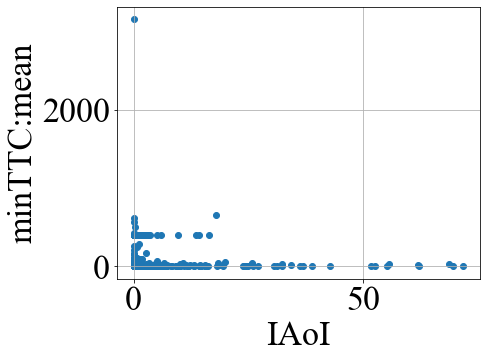

In [14]:
import matplotlib.pyplot as plt
import csv
from matplotlib.ticker import NullFormatter  # useful for `logit` scale
fig = plt.figure(figsize=(6.5, 5))
plt.rcParams.update({
    'font.size': 34, 
    "font.family": "serif", 
    "font.serif": ["Times New Roman"]
})

PacketDeliveryRate(csvName[0], minTTC_mean, 100)

plt.gca().yaxis.set_minor_formatter(NullFormatter())

# plt.legend(loc="lower left", bbox_to_anchor=(0, 1.02, 1, 0.2), mode="expand", borderaxespad=0, ncol=2)
# plt.tight_layout()
# plt.subplots_adjust(top=0.83, bottom=0.2, left=0.15, right=0.93)
# plt.grid()
plt.savefig("Result_IAoI_CR_TTC.eps", format='eps', bbox_inches='tight')
plt.show()

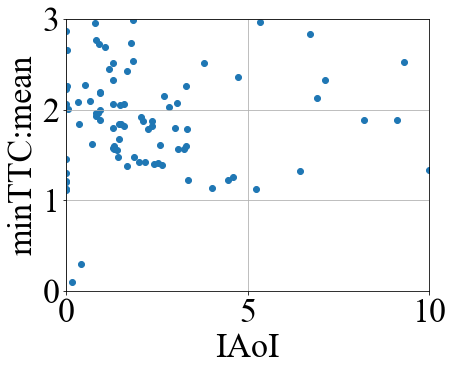

In [15]:
fig.gca().set_ylim([0.0000, 3])
fig.gca().set_xlim([0.0000, 10])
fig.savefig("Result_IAoI_CR_TTC_modify.eps", format='eps', bbox_inches='tight')
fig

test-ss95.csv
<class 'pandas.core.frame.DataFrame'>
Int64Index: 632 entries, 95 to 15239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   module     632 non-null    object 
 1   iaoi_mean  632 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 87 to 15231
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   module        624 non-null    object 
 1   maxDRAC:mean  624 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.6+ KB


/home/alanqq0624/.conda/envs/sumo/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/alanqq0624/.conda/envs/sumo/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,module,iaoi_mean,iaoi_vec,iaoi_max,maxDRAC:mean,leader_vector,leader_min,leader_mean
0,Highway.car[275].appl,1.675418,"[2.2610291798661, 1.7727814964074, 1.749521300...",2.261029,0.000000,"[0.18461880299163, 0.16981056197342, 0.1540085...",0.004495,0.092328
1,Highway.car[16].appl,1.865570,"[1.9992007312543, 0.46742367014772, 0.13281617...",20.472779,0.000000,"[-0.0275910728201, -0.027591072820098, -0.0275...",400.000000,400.000000
2,Highway.car[144].appl,0.881847,"[0.62246389263369, 0.61971495229166, 0.6102051...",4.394183,11.983283,"[1.2074604086103, 1.1542517357968, 1.100827672...",0.004453,0.291204
3,Highway.car[167].appl,0.383007,"[0.12704531115868, 0.096538795392143, 0.055112...",0.685448,0.000000,"[-0.028426565170944, -0.028426565170943, -0.02...",400.000000,400.000000
4,Highway.car[96].appl,0.450970,"[0.68027578835827, 0.40496582736161, 0.3700379...",1.839631,0.000000,"[-0.02628432022545, -0.026284320225448, -0.026...",400.000000,400.000000
...,...,...,...,...,...,...,...,...
619,Highway.car[627].appl,0.905989,"[0.18137649862357, 0.26497448028556, 0.2452145...",1.584511,0.000000,"[-0.060834651417449, -0.06057595619147, -0.059...",400.000000,400.000000
620,Highway.car[628].appl,0.153171,"[0.14948250682668, 0.140951434434, 0.167555137...",0.277531,0.000000,"[1.1142460479766, 1.1144219504719, 1.114631028...",1.114246,1.124084
621,Highway.car[629].appl,0.786966,"[0.67257285055429, 0.71685732623201, 0.6854287...",1.007994,0.000000,"[1.3444057347889, 1.3511009258181, 1.353808531...",1.344406,1.458111
622,Highway.car[630].appl,0.179173,"[0.13726936611923, 0.18063728882431, 0.1578969...",0.256214,0.000000,"[1.108455315844, 1.1085274569582, 1.1085738985...",1.108455,1.109023


<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 0 to 623
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   module         624 non-null    object 
 1   iaoi_mean      624 non-null    float64
 2   iaoi_vec       624 non-null    object 
 3   iaoi_max       624 non-null    float64
 4   maxDRAC:mean   624 non-null    float64
 5   leader_vector  624 non-null    object 
 6   leader_min     624 non-null    float64
 7   leader_mean    624 non-null    float64
dtypes: float64(5), object(3)
memory usage: 43.9+ KB


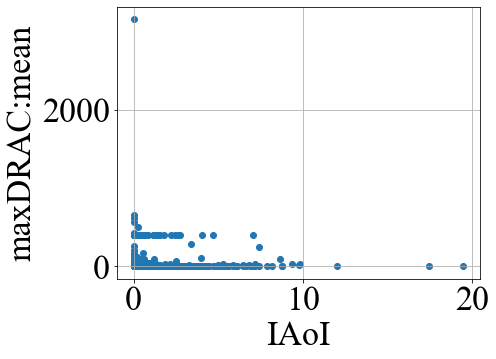

In [16]:
import matplotlib.pyplot as plt
import csv
from matplotlib.ticker import NullFormatter  # useful for `logit` scale
fig = plt.figure(figsize=(6.5, 5))
plt.rcParams.update({
    'font.size': 34, 
    "font.family": "serif", 
    "font.serif": ["Times New Roman"]
})

PacketDeliveryRate(csvName[0], maxDRAC_mean, 20)

plt.gca().yaxis.set_minor_formatter(NullFormatter())


# plt.legend(loc="lower left", bbox_to_anchor=(0, 1.02, 1, 0.2), mode="expand", borderaxespad=0, ncol=2)
# plt.tight_layout()
# plt.subplots_adjust(top=0.83, bottom=0.2, left=0.15, right=0.93)
# plt.grid()
plt.savefig("Result_IAoI_CR_DRAC.eps", format='eps', bbox_inches='tight')
plt.show()

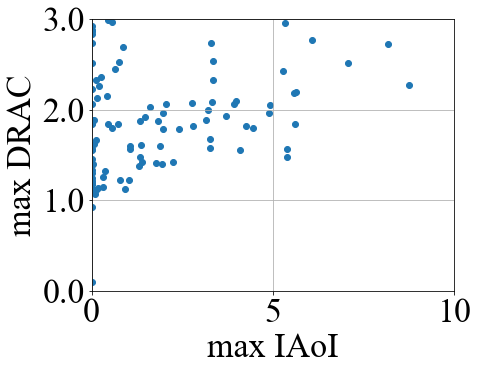

In [17]:
from matplotlib.ticker import FormatStrFormatter

fig.gca().set_ylim([0.0000, 3])
fig.gca().set_xlim([0.0000, 10])
fig.gca().set_xlabel('max IAoI')
fig.gca().set_ylabel('max DRAC')
fig.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# fig.subplots_adjust(top=0.95, bottom=0.2, left=0.23, right=0.95)
fig.savefig("Result_IAoI_CR_DRAC_modify.eps", format='eps', bbox_inches='tight')
fig

In [18]:
# df = pd.read_csv('test-ss95.csv', converters = { 
#         'attrvalue': parse_if_number, 
# #         'binedges': parse_ndarray, 
# #         'binvalues': parse_ndarray, 
#         'vectime': parse_ndarray, 
#         'vecvalue': parse_ndarray,
#         'value': parse_if_number
# })

# iaoi_mean = df[(df["name"] == IAoI_mean) & (df["value"].notnull())] 
# iaoi_mean = iaoi_mean[["module", "value"]] 
# iaoi_mean.rename(columns={"value": "iaoi_mean"}, inplace=True) 
    
# iaoi_vec = df[(df["name"] == IAoI_vector) & (df["vectime"].notnull())] 
# iaoi_vec = iaoi_vec[["module", "vecvalue"]] 
# iaoi_vec.rename(columns={"vecvalue": "iaoi_vec"}, inplace=True) 
# iaoi_vec['iaoi_max'] = [max(x) for x in iaoi_vec['iaoi_vec']]
    
# y_data = df[(df["name"] == maxDRAC_mean) & (df["value"].notnull()) & (df["value"] < 40)] 
# y_data = y_data[["module", "value"]] 
# y_data.rename(columns={"value": maxDRAC_mean}, inplace=True) 
    
# y_data_vec = df[(df["name"] == leader_vector) & (df["vectime"].notnull())] 
# y_data_vec = y_data_vec[["module", "vecvalue"]] 
# y_data_vec.rename(columns={"vecvalue": "leader_vector"}, inplace=True) 
# y_data_vec['leader_min'] = [min(x[x>0], default = 400) for x in y_data_vec['leader_vector']]
# y_data_vec['leader_mean'] = [np.mean(x[x>0]) for x in y_data_vec['leader_vector']]
    
# data_frames = [iaoi_mean, iaoi_vec, y_data, y_data_vec]
# new_df = reduce(lambda  left,right: pd.merge(left,right,on=['module'], how='inner'), data_frames)

# display(new_df)

In [19]:
# for x in y_data_vec['leader_vector']: 
#     print(len(x), ", ", len(x[x>0]))
#     print(min(x[x>0], default = 0))
#     if len(x[x>0]) > 0:
#         print(len(x), ", ", len(x[x>0]))
#     else:
#         print(x.min())

# for x in y_data_vec['leader_vector']: 
#     print(len(x), ", ", len(x[x>0]))
#     print(min(x[x>0], default = 0))
#     if len(x[x>0]) > 0:
#         print(len(x), ", ", len(x[x>0]))
#     else:
#         print(x.min())

# for x in new_df.iterrows(): 
#     if len(x[1]['iaoi_vec']) != len(x[1]['leader_vector']):
#         print(a)

# new_df['leader_mean'] = [np.mean(x[x>0]) for x in y_data_vec['leader_vector']]
new_df['leader_mean'].fillna(value = 0.0, inplace=True)

display(new_df)

# axx = pd.DataFrame(data={'a':[1,2,3,None],'b':[4,5,None,6],'c':[None,None,7,8]})
# print(axx)
# axx.fillna(value=0, inplace=True)
# print(axx)

NameError: name 'new_df' is not defined

In [ ]:
# plt.scatter(new_df["iaoi_max"], new_df['maxDRAC:mean' ])
